In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions.handy_functions as hf
from functions.parse_data import synth_dataloader


2024-04-16 11:13:04.679109: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-16 11:13:04.712671: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 11:13:04.712694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 11:13:04.713523: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 11:13:04.729167: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#Read data and name columns
df = synth_dataloader(path_name='SMHIdata2_newsurf',drop_cols=False)
#Dumb down surfaces
df=hf.dumb_down_surface(df)
df.head(10)



,Cloud_B01,Cloud_B02,Cloud_B03,Cloud_B04,Cloud_B05,Cloud_B06,Cloud_B07,Cloud_B08,Cloud_B08A,Cloud_B09,...,Sat_Zenith_Angle,Sun_Zenith_Angle,Azimuth_Diff_Angle,COT,Cloud_Type,Profile_ID,GOT,Water_Vapor,Surface_Desc,Surface_Desc_Dumb
0,0.60724,0.57804,0.51792,0.54680,0.56000,0.56824,0.57365,0.56583,0.57950,0.37962,...,9.00,68.68,48.59,25.181,3,9543,0.122,0.56,water-ice-none,water
1,0.31841,0.28975,0.25479,0.29171,0.32868,0.40295,0.44817,0.45809,0.50999,0.17019,...,1.60,73.05,176.23,1.730,2,3672,0.116,0.77,water-ice-none,water
2,0.71682,0.71170,0.68907,0.73376,0.76922,0.81416,0.83261,0.83383,0.85262,0.63399,...,14.75,42.45,16.45,20.746,4,3564,0.124,0.23,water-ice-none,water
3,0.29679,0.30316,0.32260,0.39997,0.43564,0.48821,0.52882,0.53207,0.58302,0.22735,...,7.49,55.96,96.60,0.721,1,2993,0.122,0.83,water-ice-none,water
4,0.86300,0.84968,0.80047,0.83504,0.80686,0.83849,0.86902,0.80830,0.88989,0.26912,...,1.45,51.76,79.44,49.984,3,6226,0.127,4.57,water-ice-none,water
5,0.49380,0.47968,0.45684,0.48555,0.50933,0.63299,0.71180,0.65449,0.78567,0.27385,...,9.17,64.44,87.17,11.128,2,5251,0.128,4.42,water-ice-none,water
6,0.31809,0.31475,0.34345,0.35773,0.44913,0.72468,0.78040,0.75561,0.80269,0.34052,...,10.77,68.43,122.12,4.445,1,6703,0.080,0.71,water-ice-none,water
7,0.72706,0.71760,0.68823,0.71453,0.72291,0.81518,0.87488,0.82043,0.93069,0.37696,...,10.29,41.28,9.38,22.209,5,3031,0.128,2.78,water-ice-none,water
8,0.63306,0.63913,0.63027,0.67796,0.71480,0.81141,0.86388,0.85365,0.89979,0.65188,...,7.52,48.72,141.93,18.855,4,8434,0.101,0.58,water-ice-none,water
9,0.26721,0.24895,0.24306,0.24877,0.31625,0.51416,0.57959,0.58756,0.64406,0.27037,...,13.00,67.88,100.70,0.664,5,2395,0.124,0.57,water-ice-none,water


In [3]:
print(np.unique(df['Surface_Desc'].to_numpy(), return_counts=True))
#Find tapwater 
water_df = df[df['Surface_Desc']=='water-tapwater-none']
water_df.shape


(array(['water-frost-none', 'water-ice-none', 'water-snow-coarsegranular',
       'water-snow-finegranular', 'water-snow-mediumgranular',
       'water-tapwater-none'], dtype=object), array([33180, 33620, 33260, 33520, 33200, 33220]))


(33220, 36)

In [4]:
clearcols = ['Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
             'Clear_B07','Clear_B08','Clear_B08A','Clear_B09','Clear_B10','Clear_B11','Clear_B12']
cloudcols = ['Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06',
             'Cloud_B07','Cloud_B08','Cloud_B08A','Cloud_B09','Cloud_B10','Cloud_B11','Cloud_B12']

In [5]:

print(np.mean(df[cloudcols].to_numpy(),axis=0))
print(np.mean(df['Sun_Zenith_Angle']))
print(np.std(df[cloudcols].to_numpy(),axis=0))
print(np.std(df['Sun_Zenith_Angle']))

[0.53892259 0.53099263 0.57942695 0.63021796 0.75956282 0.80769642
 0.76741546 0.83960689 0.40266414 0.06668102 0.44278633 0.34460005]
58.06583835
[0.19926734 0.17573319 0.17915619 0.1654085  0.1573165  0.15798441
 0.15100182 0.15840717 0.23289204 0.09668435 0.3132122  0.22072329]
15.56994119282951


water: 200000 = 100.0%
with std: 0.1657726372126607


ValueError: x and y must be the same size

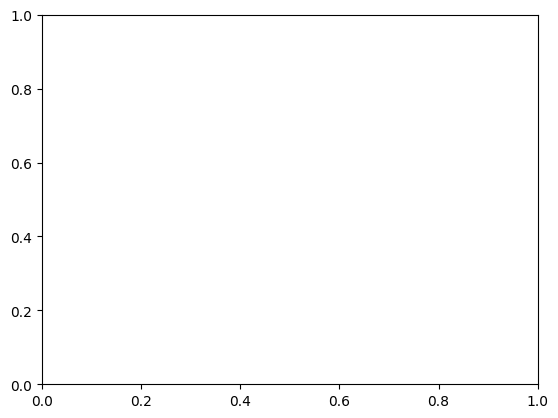

In [4]:
#Find mean of all clear data
means = np.mean(np.array(df[clearcols]),axis=0)
#Find rates of each surf type
surfs_all=np.array(df['Surface_Desc_Dumb'])
unique_surf, count_surf = np.unique(surfs_all, return_counts=True)

#Find stds, and deviations from average, of each surf type
surf_devs=np.zeros([len(unique_surf),len(clearcols)])
for i in range(len(unique_surf)):
    print(unique_surf[i]+': '+str(count_surf[i])+' = '+str(count_surf[i]/2000)+'%')
    surf_data = np.array(df[df['Surface_Desc_Dumb']==unique_surf[i]][clearcols])
    std = np.mean(np.std(surf_data,axis=0))
    print('with std: '+str(std))
    surf_devs[i,:] = np.mean(np.abs(np.array(df[df['Surface_Desc_Dumb']==unique_surf[i]][clearcols])-means),axis=0)
    
#Print deviations
x=np.arange(len(clearcols))
plt.figure()
plt.scatter(x,surf_devs[unique_surf=='vegetation',:])
plt.scatter(x,surf_devs[unique_surf=='rock',:])
plt.scatter(x,surf_devs[unique_surf=='nonphotosyntheticvegetation',:])
plt.scatter(x,surf_devs[unique_surf=='water',:])
plt.scatter(x,surf_devs[unique_surf=='soil',:])

plt.xticks(x, ['B02','B03','B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12'])
plt.title('Average deviation of each surface type by frequency band')
plt.xlabel('Frequency band')
plt.ylabel('Reflectivity')
plt.legend(['Vegetation','Rock','Non-phot. veg.','Water','Soil'],loc='upper left')
ax = plt.gca()
ax.set_ylim([0, 0.7])
plt.show()


In [5]:
#Find total amount of surface types
unique_surf_all, count_surf_all = np.unique(np.array(df['Surface_Desc']), return_counts=True)
print(len(unique_surf_all))

139


In [12]:
#Find rates of each cloud type, group mixed clouds for clarity
clouds_all=np.array(df['Cloud_Type'])
for i in range(len(clouds_all)):
    if clouds_all[i]>6:
        clouds_all[i]=7
unique_cloud, count_cloud = np.unique(clouds_all, return_counts=True)

#Find influence and COT of each surf type
cloud_inf = np.zeros([len(unique_cloud), len(clearcols)])
for i in range(len(unique_cloud)):
    cloud_data = np.array(df[clouds_all == unique_cloud[i]][cloudcols])-np.array(df[clouds_all == unique_cloud[i]][clearcols])
    cloud_inf[i,:] = np.mean(np.abs(cloud_data),axis=0)
    cloud_COT = np.mean(np.array(df[clouds_all == unique_cloud[i]]['COT']))

    print(str(unique_cloud[i])+': '+str(count_cloud[i])+' = '+str(count_cloud[i]/2000)+'%'+' with mean COT:'+str(cloud_COT))

plt.figure()
for i in range(len(unique_cloud)):
    plt.scatter(x,cloud_inf[i,:])

plt.xticks(x, ['B02','B03','B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12'])
plt.title('Influence of each cloud type for each frequency band')
plt.xlabel('Frequency band')
plt.ylabel('Reflectivity')
plt.legend(['Clear','Stratus Continental','Stratus Maritime','Cumulus Continental Clean','Cumulus Contintental Polluted','Cumulus Maritime','Cirrus','Mixed'],loc='upper left')
ax = plt.gca()
ax.set_ylim([0, 0.7])
plt.show()

0: 50000 = 25.0% with mean COT:0.0
1: 9947 = 4.9735% with mean COT:14.112264300794209
2: 10026 = 5.013% with mean COT:9.62576700578496
3: 10096 = 5.048% with mean COT:18.070454140253567
4: 9909 = 4.9545% with mean COT:24.3968747603189
5: 10022 = 5.011% with mean COT:8.63048573139094
6: 50000 = 25.0% with mean COT:17.101529859999996
7: 50000 = 25.0% with mean COT:26.88455312


NameError: name 'x' is not defined

<Figure size 640x480 with 0 Axes>